<a href="https://colab.research.google.com/github/AndrejSinadinov/web-dev-example/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving walkDataset.csv to walkDataset.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving runDataset.csv to runDataset.csv


In [4]:
import pandas as pd

public_df = pd.read_csv("dataset.csv")
walk_df = pd.read_csv("walkDataset.csv")
run_df = pd.read_csv("runDataset.csv")

print("Public dataset:", public_df.shape)
print("Walk dataset:", walk_df.shape)
print("Run dataset:", run_df.shape)

Public dataset: (88588, 11)
Walk dataset: (2751, 9)
Run dataset: (9014, 9)


In [5]:
print(public_df.columns)
print(walk_df.columns)
print(run_df.columns)

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')
Index(['time', 'seconds_elapsed', 'accel_x', 'accel_y', 'accel_z', 'gyro_x',
       'gyro_y', 'gyro_z', 'WALK'],
      dtype='object')
Index(['time', 'seconds_elapsed', 'accel_x', 'accel_y', 'accel_z', 'gyro_x',
       'gyro_y', 'gyro_z', 'RUN'],
      dtype='object')


In [6]:
walk_df.rename(columns={
    'accel_x': 'acceleration_x',
    'accel_y': 'acceleration_y',
    'accel_z': 'acceleration_z'
}, inplace=True)

run_df.rename(columns={
    'accel_x': 'acceleration_x',
    'accel_y': 'acceleration_y',
    'accel_z': 'acceleration_z'
}, inplace=True)

In [7]:
walk_df['activity'] = 'walk'
run_df['activity'] = 'run'

In [31]:
combined_df = pd.concat([public_df, walk_df, run_df], ignore_index=True)
print("Combined dataset shape:", combined_df.shape)
print(combined_df['activity'].value_counts())

Combined dataset shape: (100353, 14)
activity
1       44365
0       44223
run      9014
walk     2751
Name: count, dtype: int64


In [30]:
print(combined_df.isnull().sum())
# combined_df = combined_df.dropna().reset_index(drop=True)

date               0
time               0
username           0
wrist              0
activity           0
acceleration_x     0
acceleration_y     0
acceleration_z     0
gyro_x             0
gyro_y             0
gyro_z             0
seconds_elapsed    0
WALK               0
RUN                0
activity_enc       0
dtype: int64


In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
combined_df['activity'] = combined_df['activity'].astype(str) # Convert to string type
combined_df['activity_enc'] = le.fit_transform(combined_df['activity'])

feature_cols = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']

X = combined_df[feature_cols].values
y = combined_df['activity_enc'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
print("Features shape:", X_scaled.shape)
print("Labels shape:", y.shape)
print(pd.DataFrame(X_scaled, columns=feature_cols).head())

Features shape: (100353, 6)
Labels shape: (100353,)
   acceleration_x  acceleration_y  acceleration_z    gyro_x    gyro_y  \
0        0.101864       -0.113258        0.083713 -0.033942  0.000298   
1        0.255605       -0.185188        0.027801 -0.106070 -0.007669   
2        0.167899       -0.260590        0.103386 -0.560225  0.050551   
3        0.116249       -0.119801        0.107478  0.076630 -0.300952   
4        0.183567       -0.144774        0.094437  0.035096  0.276352   

     gyro_z  
0 -1.528961  
1  0.045012  
2 -1.275137  
3 -1.531021  
4  1.263046  


In [34]:
feature_cols = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']

X = combined_df[feature_cols].values
y = combined_df['activity_enc'].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,       # number of trees
    max_depth=None,         # let trees expand fully
    random_state=42,
    n_jobs=-1               # use all CPU cores
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.9864979323401923

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8845
           1       0.99      0.99      0.99      8873
           2       0.99      0.98      0.98      1803
           3       0.95      0.90      0.92       550

    accuracy                           0.99     20071
   macro avg       0.98      0.96      0.97     20071
weighted avg       0.99      0.99      0.99     20071


Confusion Matrix:
 [[8773   72    0    0]
 [ 100 8769    2    2]
 [   0   14 1765   24]
 [   3   30   24  493]]


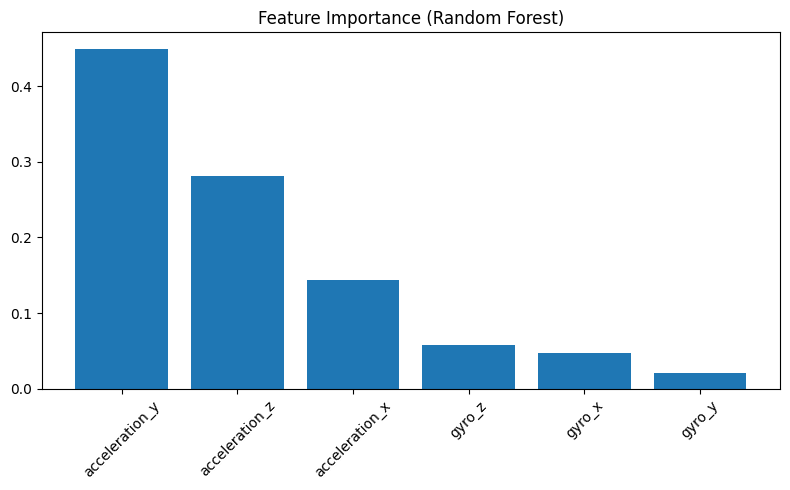

In [38]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_cols[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()